## 6.5: Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering
#### 3. Conclusion

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# folder path
path = r'C:\Users\jpelc\Documents\07-2023 UFC-Fight historical data'
# Importing orders.csv 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'UFC_Subset_clean.csv'))

In [4]:
df.shape

(11516, 12)

In [5]:
df.head()

,Knockdown,Significant_Strike_Percent,Takedown_Percent,Submission_Attempt,Significant_Strikes_Landed,Significant_Strikes_Attempted,Total_Strikes_Landed,Total_Strikes_Attempted,Takedowns_Landed,Takedowns_Attempted,Ground_Strikes_Landed,Winner
0,2,39,0,0,41,103,41,103,0,0,0,1
1,0,47,50,1,27,57,43,73,1,2,8,1
2,0,30,0,1,17,56,37,76,0,1,0,0
3,0,56,0,0,14,25,14,25,0,0,2,0
4,0,48,100,0,36,74,190,236,1,1,2,0


### 2. The elbow technique

In [6]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [7]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-169200405.05739847,
 -78139571.93561375,
 -54319042.52414136,
 -44405664.92100849,
 -38540507.599655904,
 -33709932.6128849,
 -29935278.00242377,
 -27157841.62394481,
 -24963294.238111056]

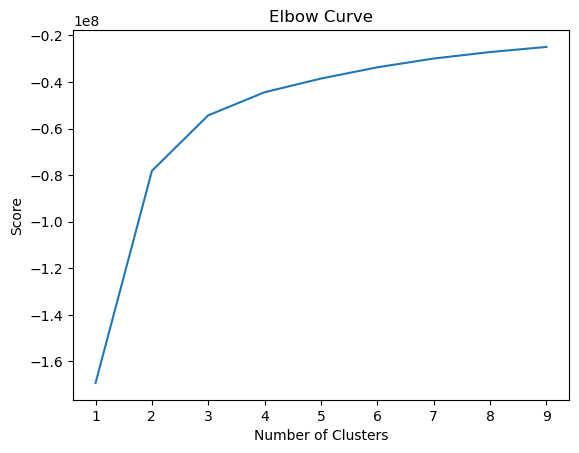

In [8]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###### Decided on 4 clusters, there is a little jump from 3 to 4 on the x-axis, but then it just flattens out.

### 3. k-means clustering

In [9]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [10]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=4)

In [11]:
df['clusters'] = kmeans.fit_predict(df)

In [12]:
df.head()

,Knockdown,Significant_Strike_Percent,Takedown_Percent,Submission_Attempt,Significant_Strikes_Landed,Significant_Strikes_Attempted,Total_Strikes_Landed,Total_Strikes_Attempted,Takedowns_Landed,Takedowns_Attempted,Ground_Strikes_Landed,Winner,clusters
0,2,39,0,0,41,103,41,103,0,0,0,1,3
1,0,47,50,1,27,57,43,73,1,2,8,1,3
2,0,30,0,1,17,56,37,76,0,1,0,0,3
3,0,56,0,0,14,25,14,25,0,0,2,0,1
4,0,48,100,0,36,74,190,236,1,1,2,0,0


In [13]:
# Clusters distribution
df['clusters'].value_counts()

1    4367
3    3802
0    2627
2     720
Name: clusters, dtype: int64

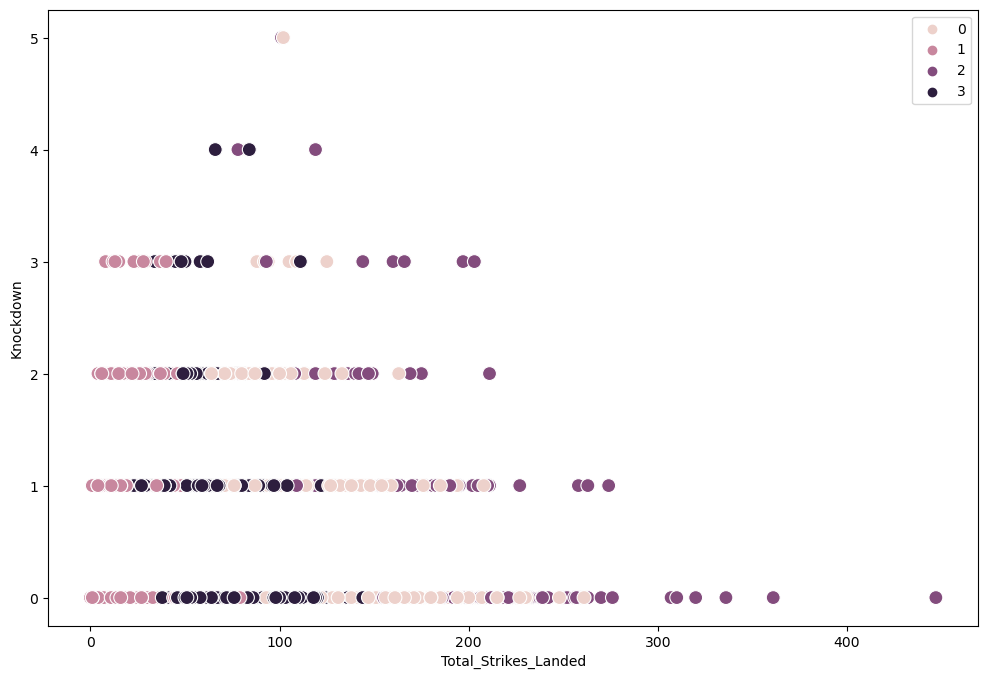

In [14]:
# Plot the clusters for the "Knockdown" and "Total_Strikes_Landed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total_Strikes_Landed'], y=df['Knockdown'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total_Strikes_Landed') # Label x-axis.
plt.ylabel('Knockdown') # Label y-axis.
plt.show()

##### The clusters make some sense, but there is not a clear division between groups. 
Some of the purple dots, that represent most of the high strike fights, also have values under 100 strikes.
The dark purple represents most of the low strike fights, but also has some outliners close to 100 strikes.
What we can see at least in this graph is that aside from 1-2 fights, any fight that has gone over 200 strikes has only had 1 knockdown or none.


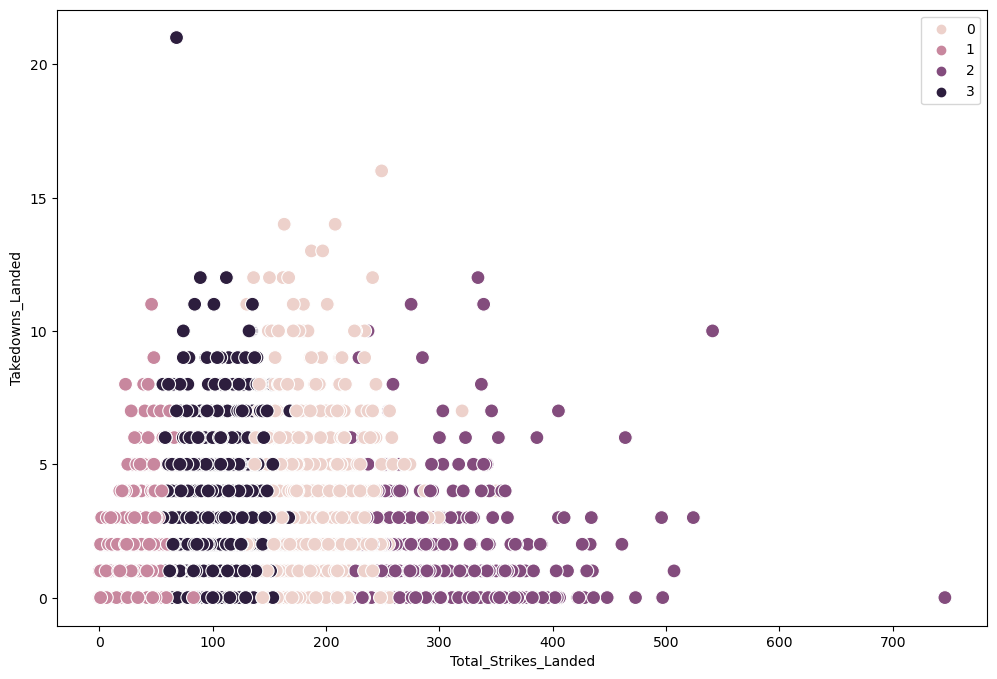

In [15]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total_Strikes_Attempted'], y=df['Takedowns_Landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total_Strikes_Landed') # Label x-axis.
plt.ylabel('Takedowns_Landed') # Label y-axis.
plt.show()

**This cluster grouping in this graph is easier to see, with some outliners. The purple dots have the highest total strikes landed, and the higher it goes the closer the values get to the x-axis.
The dark purple dots have the lowest strikes landed fights, these values start low and peak around the same position where the purple dots did.
Pink and magenta dots make up most of the fights with at least 75 strikes landed up to 250 strikes landed. These values have the highest values in the y-axis.**

**High strike fights do not mean high takedown fights.**


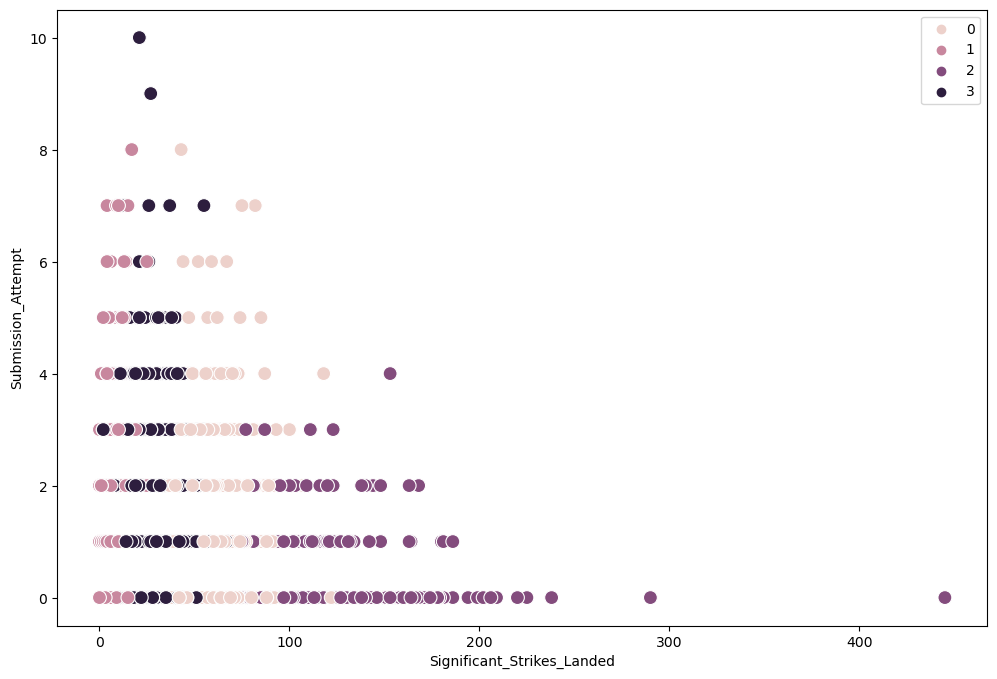

In [16]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Significant_Strikes_Landed'], y=df['Submission_Attempt'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Significant_Strikes_Landed') # Label x-axis.
plt.ylabel('Submission_Attempt') # Label y-axis.
plt.show()

**Clusters make sense, purple clusters have the most significant strikes landed per fight.
From the graph we can see that high submission fights tend to be under 100 significant strike fights. And high strike fights tend to have a low number of Submission attempts.**

In [17]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'magenta'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [18]:
df.groupby('cluster').agg({'Knockdown':['mean', 'median'],
                        'Submission_Attempt':['mean', 'median'],
                         'Significant_Strikes_Landed':['mean', 'median'], 
                         'Total_Strikes_Landed':['mean', 'median'],
                          'Takedowns_Landed':['mean', 'median']})

Knockdown        Submission_Attempt         \
                 mean median               mean median   
cluster                                                  
dark purple  0.212257    0.0           0.504997    0.0   
magenta      0.244790    0.0           0.414243    0.0   
pink         0.189951    0.0           0.328131    0.0   
purple       0.218056    0.0           0.172222    0.0   

            Significant_Strikes_Landed        Total_Strikes_Landed         \
                                  mean median                 mean median   
cluster                                                                     
dark purple                  31.983693   31.0            54.067333   51.0   
magenta                       9.956950    9.0            15.493474   13.0   
pink                         59.590027   58.0            90.351732   85.0   
purple                      105.648611  101.0           130.359722  122.0   

            Takedowns_Landed         
                        mean median  
cluster                              
dark purple         1.515255    1.0  
magenta             0.463705    0.0  
pink                1.480777    1.0  
purple              1.090278    0.0

### 4. Conclusion

Tried using 'Winner' as a variable, but as it only has two possible outcomes, there are values for each group on both sides. From the variables used, we have obtained some insight. Adding more fight statistics as variables will make it possible to create a prediction model for future fights.  A combination of all the stats using more than just a regression model and clustering would produce a percentage of how likely one fighter would be able to beat another fighter in a match.